In [25]:
# 整理数据的库
import pandas as pd
# 数据分析的库
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency #卡方检验
from scipy.stats import chi2 #画卡方分布图
# 画图
import seaborn as sns
import matplotlib.pyplot as plt

卡方检验统计量：$$\chi ^ { 2 } = \sum \frac { ( f _ { o } - f _ { e } ) ^ { 2 } } { f _ { e } }$$
其中，	 $f _ { o }$  = 观察频数； $f _ { e }$  = 期望频数


卡方检验的自由度为df = (R-1)(C-1)，R和C分别是两个分类型变量的类别量


# 卡方分布图

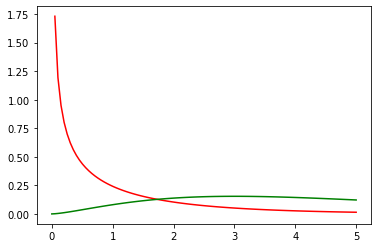

In [61]:
x = np.linspace(0,5,100)
y_1 = stats.chi2.pdf(x,df = 1)
y_2 = stats.chi2.pdf(x,df = 5)
plt.plot(x,y_1,color = 'red')
plt.plot(x,y_2,color ='green')

# 性别与电脑类型偏好

In [18]:
gender = ["female"]*120 + ["male"]*180 
pc_type = ["mac"]*12 + ["windows"]*108 + ["mac"]*24 + ["windows"]*156

In [6]:
df = pd.DataFrame(
    {
        "gender":gender,
        "pc_type":pc_type
    }
)

## 列联表（交叉表）

In [17]:
crosstab =pd.crosstab(df.gender,df.pc_type)
crosstab

pc_type,mac,windows
gender,,
female,12,108
male,24,156


In [19]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab) 

In [20]:
# 卡方值
print("chiq = " + str(stat))

chiq = 0.4748000841750843


In [21]:
# p值
print("p = " + str(p))

p = 0.4907871540801906


In [22]:
# 期望频数
expected

array([[ 14.4, 105.6],
       [ 21.6, 158.4]])

In [23]:
# 临界值（α =0.05）
limit = stats.chi2.ppf(q=0.95,df =dof)
limit

3.841458820694124

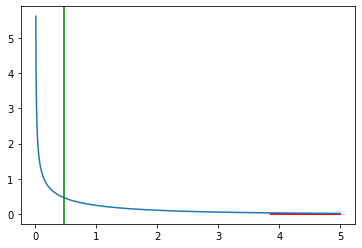

In [49]:
# 示意图
x = np.linspace(0,5,1000)
y = stats.chi2.pdf(x,df =dof)
plt.plot(x,y)
plt.fill_between(x,0,y,where= x > limit,color = 'red') #拒绝域
plt.axvline(x=stat,color = 'green')#检验统计量

**结论**：性别与电脑类型使用无显著关联（$\chi^2=0.47, p=0.49 > 0.05$）

# 泰坦尼克号的例子

In [3]:
gender = ["female"]*470 + ["male"]*1738
life_status = ["survival"]*344 + ["death"]*(470-344) + ["survival"]*374 + ["death"]*(1738-374)
df_titanic = pd.DataFrame({
    "gender": gender,
    "life_status": life_status,
})

In [4]:
crosstab_titanic =pd.crosstab(df_titanic.gender,df_titanic.life_status)
crosstab_titanic

life_status,death,survival
gender,,
female,126,344
male,1364,374


In [6]:
# 卡方检验结果（检验统计量卡方值，p值,自由度，期望频数）
stat, p, dof, expected = chi2_contingency(crosstab_titanic) 

In [7]:
stat

447.7959483713239

In [10]:
p

2.1766108525434843e-99

In [11]:
expected

array([[ 317.16485507,  152.83514493],
       [1172.83514493,  565.16485507]])

**结论**：性别与生存状况有显著关联（$\chi^2=447, p<0.05$）